# Calculate the expected RV semi-amplitude

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sb
import  astropy.units as u

from scipy.stats import gaussian_kde, percentileofscore as pos
from astropy.units import R_earth, R_jup, R_sun, M_earth, M_sun
from astropy.constants import G

from spright import RMRelation

rc('figure', figsize=(13,5))

In [4]:
%run src/core.py

In [5]:
%run src/plotting.py

In [6]:
rmr = RMRelation()

KeyError: "Extension 'rd_cdf' not found."

In [11]:
mass_distribution = rmr.sample('mass', (1.54, 0.09), 50_000)

In [7]:
density_distribution = rmr.sample('density', (1.54, 0.09), 50_000)

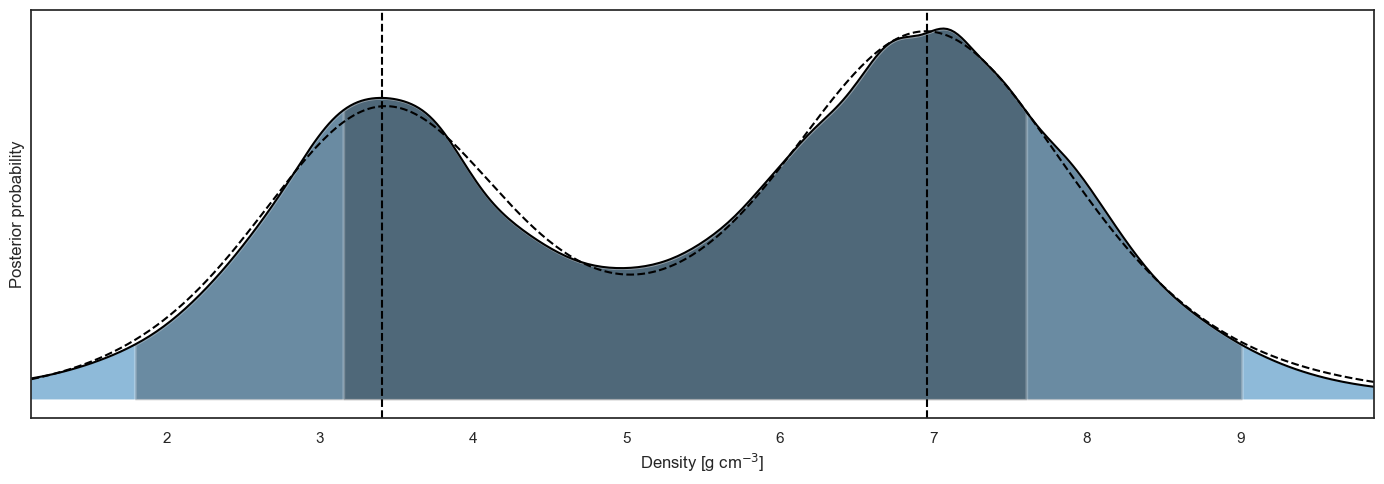

In [8]:
density_distribution.plot()

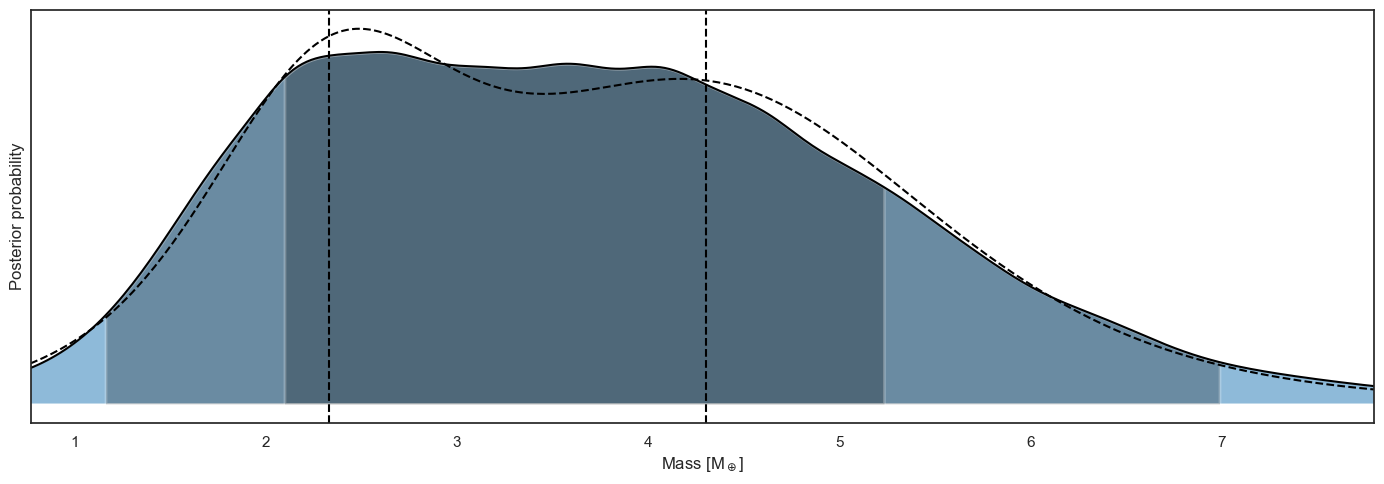

In [12]:
mass_distribution.plot()

In [7]:
ns = mass_distribution.size

mstar = normal(star_m.n, star_m.s, ns)
mplanet = mass_distribution.samples
pr = normal(period.n, period.s, ns)

NameError: name 'mass_distribution' is not defined

In [10]:
star_m

0.228+/-0.023

In [8]:
period

2.326214+/-0.000223

In [14]:
k = (2*pi*G / (pr * u.d).to(u.s))**(1/3) * (mplanet * M_earth).to(u.kg) / (mstar * M_sun).to(u.kg)**(2/3)

In [15]:
percentile(k, [2.5, 97.5])

<Quantity [1.47952308, 9.20789058] m / s>

In [10]:
percentile(k, [2.5, 97.5])

<Quantity [1.49313491, 9.15497163] m / s>

In [16]:
plims = 50 - 68/2, 50 + 68/2, 50 - 95/2, 50 + 95/2, 50 - 99.7/2, 50 + 99.7/2

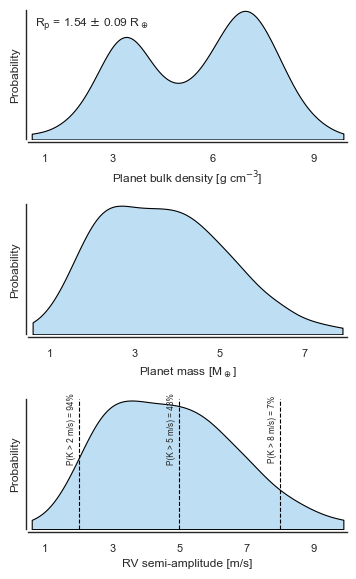

In [17]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, axs = subplots(3, 1, figsize=(AACW, 1.65*AACW))
    c = sb.set_hls_values('C0', l=0.85)
    
    ax = axs[0]
    kde = gaussian_kde(density_distribution.samples, bw_method=0.2)
    x = linspace(0.6, 9.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')
    ax.text(0.02, 0.95, 'R$_\mathrm{p}$ = 1.54 $\pm$ 0.09 R$_\oplus$', va='top', transform=ax.transAxes)
    setp(axs[0], xlabel='Planet bulk density [g cm$^{-3}$]', ylabel='Probability', yticks=[], ylim=(0, 1.01*y.max()), 
         xlim=(0.5, 10), xticks=[1,3,6,9])
    
    ax = axs[1]
    kde = gaussian_kde(mass_distribution.samples, bw_method=0.2)
    x = linspace(0.6, 7.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')
    setp(axs[1], xlabel='Planet mass [M$_\oplus$]', ylabel='Probability', yticks=[], ylim=(0, 1.01*y.max()), 
         xlim=(0.5, 8), xticks=[1,3,5,7])

    ax = axs[2]
    kde = gaussian_kde(k, bw_method=0.2)
    x = linspace(0.6, 9.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')

    for p in (2, 5, 8):
        axvline(p, c='k', lw=0.8, ls='--')
        ax.text(p-0.35, 0.14, f'P(K > {p} m/s) = {100 - pos(k, p):.0f}%', size='x-small', rotation=90, va='center')

    setp(axs[2], xlabel='RV semi-amplitude [m/s]', ylabel='Probability', yticks=[], xticks=[1,3,5,7,9], 
         xlim=(0.5, 10), ylim=(0, 1.01*y.max()))
    
    #for ax,lb in zip(axs, 'a. b. c.'.split()):
    #    ax.text(0.02, 0.98, lb, va='top', transform=ax.transAxes)
    
    sb.despine(fig, offset=2)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.08, left=0.07, right=0.99, top=0.99, hspace=0.5)
    fig.savefig('plots/TOI_2266b_rv_semiamplitude_paper.pdf')

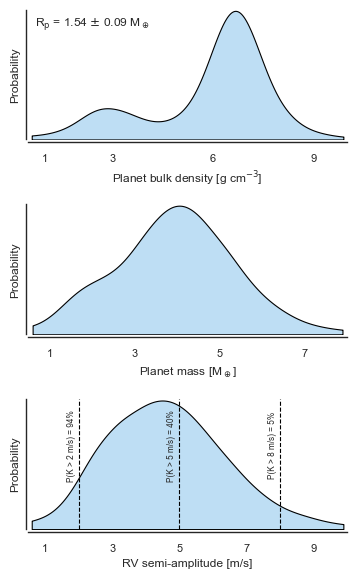

In [143]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, axs = subplots(3, 1, figsize=(AACW, 1.65*AACW))
    c = sb.set_hls_values('C0', l=0.85)
    
    ax = axs[0]
    kde = gaussian_kde(density_distribution.samples, bw_method=0.2)
    x = linspace(0.6, 9.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')
    ax.text(0.02, 0.95, 'R$_\mathrm{p}$ = 1.54 $\pm$ 0.09 M$_\oplus$', va='top', transform=ax.transAxes)
    setp(axs[0], xlabel='Planet bulk density [g cm$^{-3}$]', ylabel='Probability', yticks=[], ylim=(0, 1.01*y.max()), 
         xlim=(0.5, 10), xticks=[1,3,6,9])
    
    ax = axs[1]
    kde = gaussian_kde(mass_distribution.samples, bw_method=0.2)
    x = linspace(0.6, 7.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')
    setp(axs[1], xlabel='Planet mass [M$_\oplus$]', ylabel='Probability', yticks=[], ylim=(0, 1.01*y.max()), 
         xlim=(0.5, 8), xticks=[1,3,5,7])

    ax = axs[2]
    kde = gaussian_kde(k, bw_method=0.2)
    x = linspace(0.6, 9.9, 500)
    y = kde(x)
    ax.fill_between(x, y, fc=c, ec='k')

    for p in (2, 5, 8):
        axvline(p, c='k', lw=0.8, ls='--')
        ax.text(p-0.35, 0.14, f'P(K > {p} m/s) = {100 - pos(k, p):.0f}%', size='x-small', rotation=90, va='center')

    setp(axs[2], xlabel='RV semi-amplitude [m/s]', ylabel='Probability', yticks=[], xticks=[1,3,5,7,9], 
         xlim=(0.5, 10), ylim=(0, 1.01*y.max()))
    
    #for ax,lb in zip(axs, 'a. b. c.'.split()):
    #    ax.text(0.02, 0.98, lb, va='top', transform=ax.transAxes)
    
    sb.despine(fig, offset=2)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.08, left=0.07, right=0.99, top=0.99, hspace=0.5)
    fig.savefig('plots/TOI_2266b_rv_semiamplitude_paper.pdf')

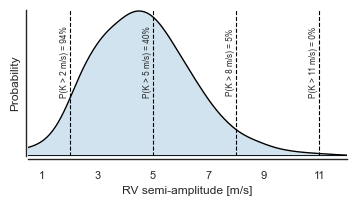

In [46]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 0.55*AACW))
    ax.fill_between(x, y, alpha=0.2)
    ax.plot(x, y, 'k', lw=1)
    ax.plot([0, 12], [0, 0], 'k', lw=2, zorder=50)

    for p in (2, 5, 8, 11):
        axvline(p, c='k', lw=0.8, ls='--')
        ax.text(p-0.35, 0.14, f'P(K > {p} m/s) = {100 - pos(k, p):.0f}%', size='x-small', rotation=90, va='center')

    setp(ax, xlabel='RV semi-amplitude [m/s]', ylabel='Probability', yticks=[], xticks=[1,3,5,7,9,11], 
         xlim=(0.5, 12), ylim=(0, 1.01*y.max()))
    sb.despine(fig, offset=2)
    fig.subplots_adjust(bottom=0.22, left=0.07, right=0.99, top=0.99)


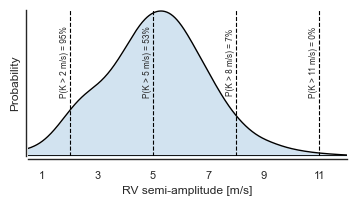

In [28]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 0.55*AACW))
    ax.fill_between(x, y, alpha=0.2)
    ax.plot(x, y, 'k', lw=1)
    ax.plot([0, 12], [0, 0], 'k', lw=2, zorder=50)

    for p in (2, 5, 8, 11):
        axvline(p, c='k', lw=0.8, ls='--')
        ax.text(p-0.35, 0.14, f'P(K > {p} m/s) = {100 - pos(k, p):.0f}%', size='x-small', rotation=90, va='center')

    setp(ax, xlabel='RV semi-amplitude [m/s]', ylabel='Probability', yticks=[], xticks=[1,3,5,7,9,11], 
         xlim=(0.5, 12), ylim=(0, 1.01*y.max()))
    sb.despine(fig, offset=2)
    fig.subplots_adjust(bottom=0.22, left=0.07, right=0.99, top=0.99)
    fig.savefig('plots/TOI_2266b_rv_semiamplitude_paper.pdf')